Step 1: Webscraping for first 30 pages from recipe-index in skinnytaste.com

In [29]:
import requests
from bs4 import BeautifulSoup as bs
import urllib.request
from PIL import Image

import csv

csvfile = open('FoodTaste_30pages.csv','w')
csvwriter = csv.writer(csvfile)

header = ["Title", "Imagelink", "Calorie", "Personalpoints", "Summary"]
csvwriter.writerow(header)
my_dict = {}
i=1
for page in range(1,31):

  website = f"https://www.skinnytaste.com/recipe-index/?_paged={page}"
  #print(website) poop through ttge first 30 page

  req = requests.get(website).text #makes request to the websites
  soup = bs(req,"lxml") #parse the webpage using the xml parser and creating soup objec

  box = soup.find(id='primary') #finds the tag with the id primary

  #print(box.prettify())
  job_elements = box.find_all("div", class_="post-content ast-grid-common-col")
  #finding all div tag with class attribute post_content
  print(f'\033[1mPage number: {page}\033[0m')

  for job_element in job_elements:

    title = job_element.find("h2",class_="entry-title") #finding the first h2 header with class atttribute entry-tittle
    print("Title:",title.text)
    Title = title.text

    image = job_element.find('img').get("src")
    print("Image:", image)

    link = job_element.find("a", href=True)
    print("Link:", link.get('href'))
    reqs = requests.get(link.get('href'))
    individualhtml = reqs.content
    individualsoup = bs(individualhtml,"lxml")

    calorie = individualsoup.find("span", class_='recipe-meta-value value-calories')
    if calorie is not None:
      print(calorie.text)
      Calorie = calorie.text
    else:
      Calorie = None
      print("Cals: Not mentioned")

    personalpoints = individualsoup.find("span", class_='recipe-meta-value recipe-ww-pp icon')
    if personalpoints is not None:
      print("Personal Points:", personalpoints.text)
      Personalpoints = personalpoints.text
    else:
      Personalpoints = None
      print("Personal Points : Not mentioned")

    summary = individualsoup.find("p")
    if summary is not None:
      print("Summary:", summary.text)
      Summary = summary.text
    else:
      Summary = None
      print("Summary : Not mentioned")

    recipe = individualsoup.find("ol")
    if recipe is not None:
      Recipe = recipe.text
    else:
      Recipe = None
    csvwriter.writerow([Title, image, Calorie, Personalpoints, Summary])
    print('\n')
    i = i+1
  print('\n')
  print('\n')
csvfile.close()

Page number: 1
Title: 23 Easy Crock Pot Chicken Recipes
Image: https://www.skinnytaste.com/wp-content/uploads/2023/05/23-crock-pot-chicken-260x390.png
Link: https://www.skinnytaste.com/crock-pot-chicken-recipes/
Cals: Not mentioned
Personal Points : Not mentioned
Summary: These Easy Crock Pot Chicken Recipes are ready to come to the rescue on busy weeknights. Give your oven the night off, because I’m sharing some of my best healthy chicken recipes that you can make in your slow cooker.


Title: Pumpkin Chocolate Chip Cookies
Image: https://www.skinnytaste.com/wp-content/uploads/2023/09/230915_soft-pumpkin-chocolate-chip-cookies-12-260x390.jpg
Link: https://www.skinnytaste.com/pumpkin-chocolate-chip-cookies/
Cals: 95
Personal Points: 5
Summary: These soft Pumpkin Chocolate Chip Cookies, made with pumpkin puree, pumpkin spice, and cream cheese, have a cake-like texture and lots of pumpkin flavor!


Title: The 4 Best Olive Oil Sprayers of 2023
Image: https://www.skinnytaste.com/wp-content

Step 2: Visualization

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.display import display

data = pd.read_csv("FoodTaste_30pages.csv")

In [31]:
data.head()

,Title,Imagelink,Calorie,Personalpoints,Summary
0,23 Easy Crock Pot Chicken Recipes,https://www.skinnytaste.com/wp-content/uploads...,NaN,NaN,These Easy Crock Pot Chicken Recipes are ready...
1,Pumpkin Chocolate Chip Cookies,https://www.skinnytaste.com/wp-content/uploads...,Cals: 95,5.0,"These soft Pumpkin Chocolate Chip Cookies, mad..."
2,The 4 Best Olive Oil Sprayers of 2023,https://www.skinnytaste.com/wp-content/uploads...,NaN,NaN,The best olive oil sprayers make coating your ...
3,Free 7 Day Healthy Meal Plan (Sept 25-Oct 1),https://www.skinnytaste.com/wp-content/uploads...,NaN,NaN,"A free 7-day, flexible weight loss meal plan i..."
4,Coconut Curry Butternut Squash Soup,https://www.skinnytaste.com/wp-content/uploads...,Cals: 108,2.0,"Coconut milk, curry and Indian spices complime..."


In [32]:
data.Calorie = pd.to_numeric(data.Calorie.str.replace('Cals: ', ''))
data.Personalpoints = pd.to_numeric(data.Personalpoints)


In [33]:
data.head()

,Title,Imagelink,Calorie,Personalpoints,Summary
0,23 Easy Crock Pot Chicken Recipes,https://www.skinnytaste.com/wp-content/uploads...,NaN,NaN,These Easy Crock Pot Chicken Recipes are ready...
1,Pumpkin Chocolate Chip Cookies,https://www.skinnytaste.com/wp-content/uploads...,95.0,5.0,"These soft Pumpkin Chocolate Chip Cookies, mad..."
2,The 4 Best Olive Oil Sprayers of 2023,https://www.skinnytaste.com/wp-content/uploads...,NaN,NaN,The best olive oil sprayers make coating your ...
3,Free 7 Day Healthy Meal Plan (Sept 25-Oct 1),https://www.skinnytaste.com/wp-content/uploads...,NaN,NaN,"A free 7-day, flexible weight loss meal plan i..."
4,Coconut Curry Butternut Squash Soup,https://www.skinnytaste.com/wp-content/uploads...,108.0,2.0,"Coconut milk, curry and Indian spices complime..."


In [34]:
#Checking missing values
data.isnull().sum()

Title              0
Imagelink          0
Calorie           38
Personalpoints    40
Summary            1
dtype: int64

In [35]:
#Drop the row with missing value in calorie and personalpoints
data = data[-data.Calorie.isnull()].copy()
data = data[-data.Personalpoints.isnull()].copy()

#Again check if there is any missing value which should indicate zero is all parameters
data.isnull().sum()

Title             0
Imagelink         0
Calorie           0
Personalpoints    0
Summary           1
dtype: int64

Text(0.5, 1.0, 'Histogram of Calorie')

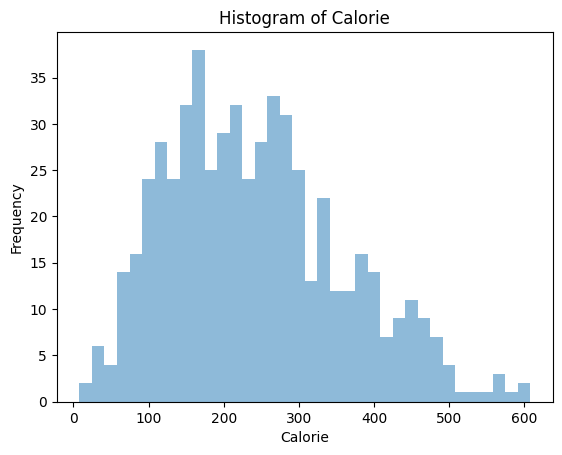

In [36]:
#Visualization of calorie distribution
data['Calorie'].plot.hist(bins=36, alpha=0.5)
plt.xlabel("Calorie")
plt.ylabel('Frequency')
plt.title('Histogram of Calorie')

Text(0.5, 1.0, 'Histogram of Personalpoints')

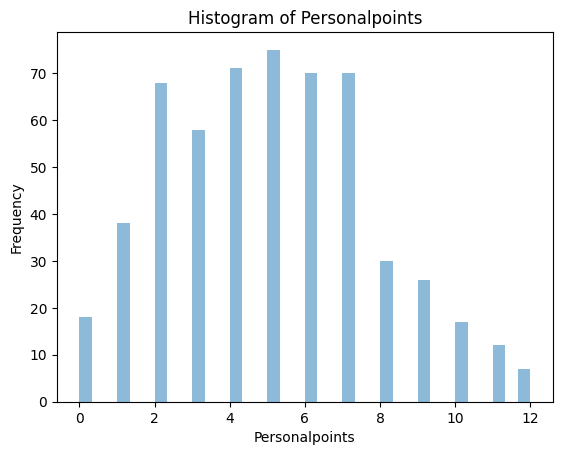

In [37]:
#Visualization of Personalpoints distribution
data['Personalpoints'].plot.hist(bins=36, alpha=0.5)
plt.xlabel("Personalpoints")
plt.ylabel('Frequency')
plt.title('Histogram of Personalpoints')

Step 3: Get minimum and maximum calorie from user and output the first 5 foods sorted based on calories with their image and their summary.

In [51]:
min_calorie = int(input("Enter the minimum calorie range: "))
max_calorie = int(input("Enter the maximum calorie range: "))

filtered_data = data[(data['Calorie'] >= min_calorie) & (data['Calorie'] <= max_calorie)]

print("\nFirst five foods within the calorie range {}-{}:".format(min_calorie, max_calorie))
print(filtered_data.head(5))

#View Images
print("\nImages")
for i in range(5):

  display(Image(url=filtered_data["Imagelink"].iloc[i]))

Enter the minimum calorie range: 300
Enter the maximum calorie range: 600

First five foods within the calorie range 300-600:
                               Title  \
11    Stuffed Shells with Meat Sauce   
17    Cinnamon-Raisin Overnight Oats   
21  Pasta with Creamy Zucchini Sauce   
27               Cajun Chicken Pasta   
42         Chicken Eggplant Parmesan   

                                            Imagelink  Calorie  \
11  https://www.skinnytaste.com/wp-content/uploads...    360.9   
17  https://www.skinnytaste.com/wp-content/uploads...    378.0   
21  https://www.skinnytaste.com/wp-content/uploads...    390.0   
27  https://www.skinnytaste.com/wp-content/uploads...    324.0   
42  https://www.skinnytaste.com/wp-content/uploads...    473.0   

    Personalpoints                                            Summary  
11             9.0  Stuffed Shells with Meat Sauce made with jumbo...  
17             8.0  Easy Cinnamon-Raisin Overnight Oats are the pe...  
21            11.0  

Step 3: Get minimum and maximum points from user and output the first 5 foods sorted based on points with their image and their summary.

In [50]:
min_points = int(input("Enter the minimum point range: "))
max_points = int(input("Enter the maximum points range: "))

filtered_data = data[(data['Personalpoints'] >= min_points) & (data['Personalpoints'] <= max_points)]

print("\nFirst five foods within the point range {}-{}:".format(min_points, max_points))
print(filtered_data.head(5))

#View Images
print("\nImages")
for i in range(5):

  display(Image(url=filtered_data["Imagelink"].iloc[i]))









Enter the minimum point range: 2
Enter the maximum points range: 6

First five foods within the point range 2-6:
                                 Title  \
1       Pumpkin Chocolate Chip Cookies   
4  Coconut Curry Butternut Squash Soup   
5                 Pumpkin Bread Recipe   
6     Roasted Broccoli and Cauliflower   
7           Pumpkin Baked Oatmeal Cups   

                                           Imagelink  Calorie  Personalpoints  \
1  https://www.skinnytaste.com/wp-content/uploads...     95.0             5.0   
4  https://www.skinnytaste.com/wp-content/uploads...    108.0             2.0   
5  https://www.skinnytaste.com/wp-content/uploads...    103.0             5.0   
6  https://www.skinnytaste.com/wp-content/uploads...    163.0             4.0   
7  https://www.skinnytaste.com/wp-content/uploads...    104.0             2.0   

                                             Summary  
1  These soft Pumpkin Chocolate Chip Cookies, mad...  
4  Coconut milk, curry and Indian spi

In [44]:
filtered_data["Imagelink"].iloc[0]

'https://www.skinnytaste.com/wp-content/uploads/2023/09/230915_soft-pumpkin-chocolate-chip-cookies-12-260x390.jpg'

In [46]:
from IPython.display import Image
from IPython.display import display

# URL of the image you want to view
image_url = filtered_data["Imagelink"].iloc[0]

# Display the image
display(Image(url=image_url))